<a href="https://colab.research.google.com/github/kamrulhuda/TensorflowTutorial/blob/main/Linear_Regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression with TensorFlow**

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-05-02 10:27:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   245KB/s    in 0.3s    

2021-05-02 10:27:48 (245 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
df= pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [14]:
train_x= np.asanyarray(df[['ENGINESIZE']])
train_y= np.asanyarray(df[['CO2EMISSIONS']])

#irst, we initialize the variables a and b, with any random guess, and then we define the linear function:

a= tf.Variable(20.0)
b= tf.Variable(30.2)

def h(x):
  y= a*x + b
  return 

def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))


Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:

In [15]:
learning_rate= 0.01
train_data=[]
loss_values=[]
# steps of looping through all your data to update the parameters
training_epochs= 200

for epoch in range(training_epochs):
  with tf.GradientTape() as tape:
    y_predicted= h(train_x)
    loss_value= loss_object(train_y, y_predicted)
    loss_values.append(loss_value)

    #get gradients
    gradients= tape.gradient(loss_value, [b,a])
 
    #compute and adust weights
    b.assign_sub(gradients[0]*learning_rate)
    a.assign_sub(gradients[1]*learning_rate)

    if epoch %5==0:
      train_data.append([a.numpy(), b.numpy()])

TypeError: ignored

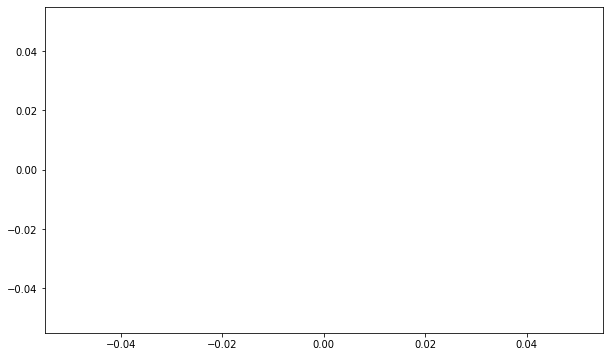

In [16]:
#Lets plot the loss values to see how it has changed during the training:
plt.plot(loss_values, 'ro')